In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

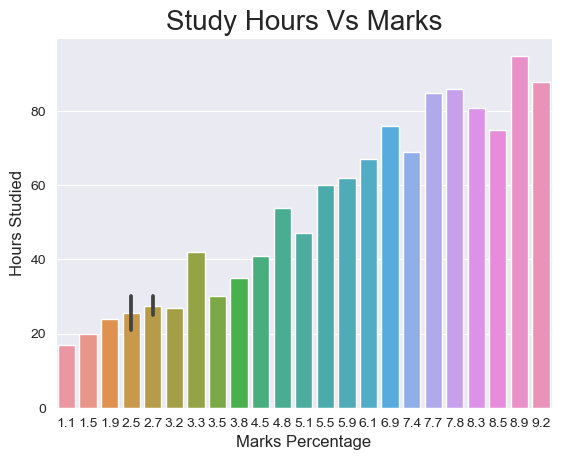

In [13]:
sns.set_style('darkgrid')
sns.barplot(x='Hours',y='Scores',data = df)
plt.title('Study Hours Vs Marks',size=20)
plt.xlabel('Marks Percentage', size=12)
plt.ylabel('Hours Studied', size=12)
plt.show()

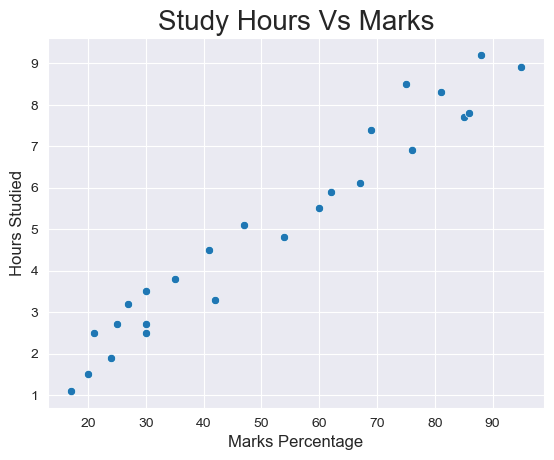

In [14]:
sns.scatterplot(x='Scores',y='Hours',data=df)
plt.title('Study Hours Vs Marks',size=20)
plt.xlabel('Marks Percentage', size=12)
plt.ylabel('Hours Studied', size=12)
plt.show()

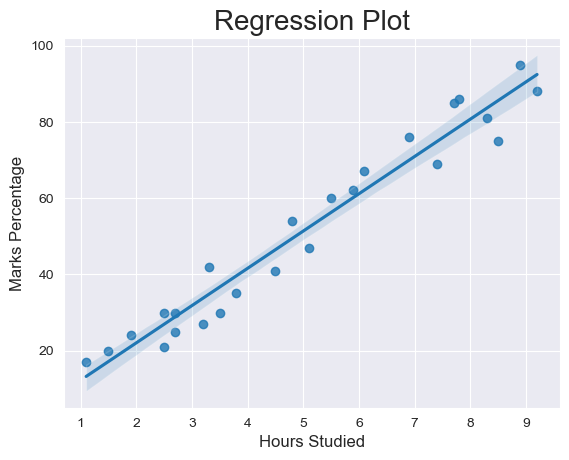

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [15]:
sns.regplot(x='Hours', y='Scores',data=df)
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(df.corr())

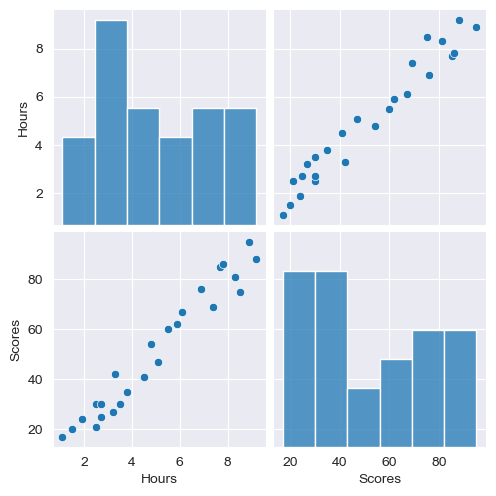

In [38]:
sns.pairplot(data=df)

<Axes: >

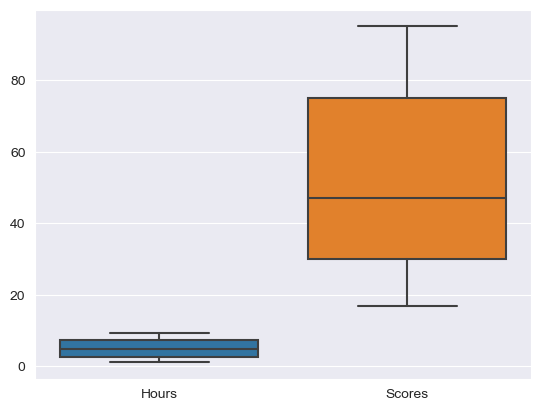

In [39]:
sns.boxplot(data=df)

In [25]:
X= df.iloc[:, :-1].values
y= df.iloc[:, 1].values

In [17]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lm=LinearRegression()

In [29]:
lm.fit(X_train, y_train)

LinearRegression()

In [32]:
pred_y = lm.predict(X_test)
prediction = pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,2.5,27.018782
1,7.7,78.844662
2,3.8,39.975252
3,7.4,75.854708
4,5.5,56.918328
5,4.8,49.941767
6,3.2,33.995343
7,8.5,86.817875


In [33]:
compare_scores = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,30,27.018782
1,85,78.844662
2,35,39.975252
3,69,75.854708
4,60,56.918328
5,54,49.941767
6,27,33.995343
7,75,86.817875


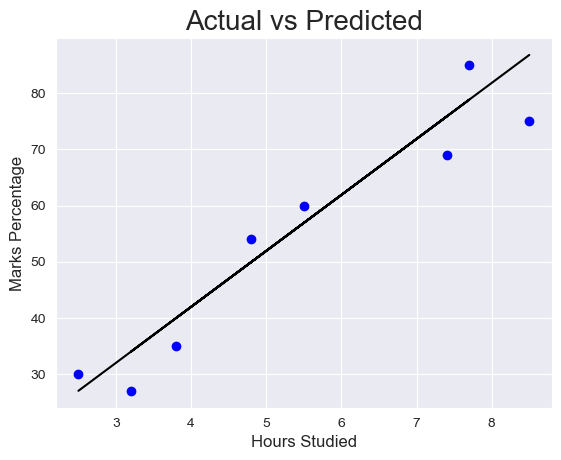

In [34]:
plt.scatter(x=X_test, y=y_test, color='blue')
plt.plot(X_test, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

In [35]:
from sklearn.metrics import mean_absolute_error

In [36]:
print('Mean absolute error: ',mean_absolute_error(y_test,pred_y))

Mean absolute error:  5.864954643694258


In [37]:
hours = [9.25]
answer = lm.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 94.293
